In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('lemmatized_text.csv')
df.head()

,Unnamed: 0,file_id,user_id,subforum_id,num_contexts,label,text,corrected_text,lemma_text
0,0,12834217_1,572066,1346,0,noHate,"As of March 13th , 2014 , the booklet had been...",as of march 13th 2014 the booklet had been d...,as of march 13th 2014 the booklet have be ...
1,1,12834217_2,572066,1346,0,noHate,In order to help increase the booklets downloa...,in order to help increase the booklets downloa...,in order to help increase the booklet download...
2,2,12834217_3,572066,1346,0,noHate,( Simply copy and paste the following text int...,simply copy and paste the following text into ...,simply copy and paste the follow text into you...
3,3,12834217_4,572066,1346,0,hate,Click below for a FREE download of a colorfull...,click below for a free download of a colorfull...,click below for a free download of a colorfull...
4,4,12834217_5,572066,1346,0,noHate,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,click on the download 742 mb green banner ...,click on the download 742 mb green bann...


In [3]:
pd.DataFrame({'dtypes':df.dtypes,'null_count':df.isnull().sum(),
              'unique_values':df.nunique(),
             'percent_of_null_values':df.isnull().mean()})

,dtypes,null_count,unique_values,percent_of_null_values
Unnamed: 0,int64,0,10703,0.000000
file_id,object,0,10703,0.000000
user_id,int64,0,2778,0.000000
subforum_id,int64,0,21,0.000000
num_contexts,int64,0,20,0.000000
label,object,0,2,0.000000
text,object,0,10493,0.000000
corrected_text,object,46,10423,0.004298
lemma_text,object,46,10422,0.004298


In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(10657, 9)

### Using a model from hugging face to get the predictions for 'normal text' and 'lemma text' separately

##### Model_name:"irlab-udc/MetaHateBERT"

In [6]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe_1 = pipeline("text-classification", model="irlab-udc/MetaHateBERT")

C:\Users\Kavin\anaconda3\envs\nlp_hatespeech\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Kavin\anaconda3\envs\nlp_hatespeech\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [7]:
predicted_label_normal=[]
predicted_score_normal=[]

def predictions_model_normal():

    for sent in df['corrected_text']:
        
            #Passing the 'lemma_string' into the model and making predictions
            label_and_score=pipe_1(sent)

            predicted_label_normal.append(label_and_score[0]['label'])
            predicted_score_normal.append(label_and_score[0]['score'])

            if len(predicted_label_normal)%1000==0:
                print(f'Predictions made for {len(predicted_label_normal)} items')

In [8]:
predictions_model_normal()

df['predicted_label_normal']=predicted_label_normal
df['predicted_score_normal']=predicted_score_normal
df[['text','corrected_text','label','predicted_label_normal','predicted_score_normal']].head()

Predictions made for 1000 items
Predictions made for 2000 items
Predictions made for 3000 items
Predictions made for 4000 items
Predictions made for 5000 items
Predictions made for 6000 items
Predictions made for 7000 items
Predictions made for 8000 items
Predictions made for 9000 items
Predictions made for 10000 items


,text,corrected_text,label,predicted_label_normal,predicted_score_normal
0,"As of March 13th , 2014 , the booklet had been...",as of march 13th 2014 the booklet had been d...,noHate,no hate,0.995001
1,In order to help increase the booklets downloa...,in order to help increase the booklets downloa...,noHate,no hate,0.994424
2,( Simply copy and paste the following text int...,simply copy and paste the following text into ...,noHate,no hate,0.994773
3,Click below for a FREE download of a colorfull...,click below for a free download of a colorfull...,hate,hate,0.838828
4,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,click on the download 742 mb green banner ...,noHate,no hate,0.992988


In [9]:
predicted_label_lemma=[]
predicted_score_lemma=[]

def predictions_model_lemma():
    
    for sent in df['lemma_text']:

            #Passing the 'lemma_string' into the model and making predictions
            label_and_score=pipe_1(sent)

            predicted_label_lemma.append(label_and_score[0]['label'])
            predicted_score_lemma.append(label_and_score[0]['score'])

            if len(predicted_label_lemma)%1000==0:
                print(f'Predictions made for {len(predicted_label_lemma)} items')

In [10]:
predictions_model_lemma()

df['predicted_label_lemma']=predicted_label_lemma
df['predicted_score_lemma']=predicted_score_lemma
df[['text','lemma_text','label','predicted_label_lemma','predicted_score_lemma']].head()

Predictions made for 1000 items
Predictions made for 2000 items
Predictions made for 3000 items
Predictions made for 4000 items
Predictions made for 5000 items
Predictions made for 6000 items
Predictions made for 7000 items
Predictions made for 8000 items
Predictions made for 9000 items
Predictions made for 10000 items


,text,lemma_text,label,predicted_label_lemma,predicted_score_lemma
0,"As of March 13th , 2014 , the booklet had been...",as of march 13th 2014 the booklet have be ...,noHate,no hate,0.994972
1,In order to help increase the booklets downloa...,in order to help increase the booklet download...,noHate,no hate,0.994310
2,( Simply copy and paste the following text int...,simply copy and paste the follow text into you...,noHate,no hate,0.994931
3,Click below for a FREE download of a colorfull...,click below for a free download of a colorfull...,hate,hate,0.822070
4,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,click on the download 742 mb green bann...,noHate,no hate,0.992988


In [11]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_metrics(predictions_labels):
    
    # define confusion matrix
    confusion_matrix = metrics.confusion_matrix(ground_truth, predictions_labels)
    print(confusion_matrix)
    print('...........................................................................\n')
    # define and print matrix with labels
    sns.heatmap(confusion_matrix,
                annot=True,
                fmt='g',
                xticklabels=['Not Hate','Hate'],
                yticklabels=['Not Hate','Hate'])

    # display matrix
    plt.ylabel('Actual',fontsize=12)
    plt.xlabel('Prediction',fontsize=12)
    plt.show()
    print('...........................................................................\n')
    # create and print classification report
    report = classification_report(ground_truth, predictions_labels)
    print(report)

In [12]:
#True labels
ground_truth=list(df['label'].map({'noHate':0,'hate':1}))

#normal text predictions
predictions_normal=list(df['predicted_label_normal'].map({'no hate':0,'hate':1}))

[[8390 1071]
 [  93 1103]]
...........................................................................



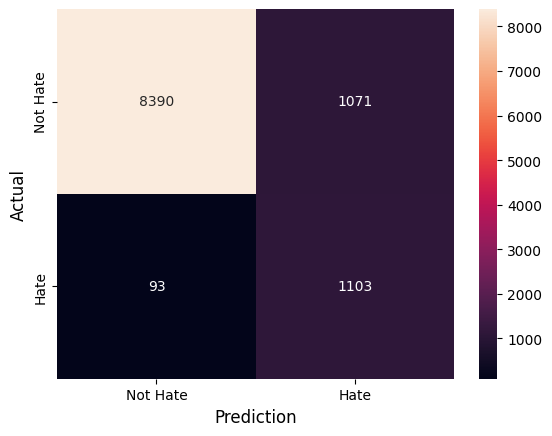

...........................................................................

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      9461
           1       0.51      0.92      0.65      1196

    accuracy                           0.89     10657
   macro avg       0.75      0.90      0.79     10657
weighted avg       0.93      0.89      0.90     10657



In [13]:
calculate_metrics(predictions_normal)

In [14]:
#True labels
ground_truth=list(df['label'].map({'noHate':0,'hate':1}))

#lemma text predictions
predictions_lemma=list(df['predicted_label_lemma'].map({'no hate':0,'hate':1}))

[[8247 1214]
 [ 161 1035]]
...........................................................................



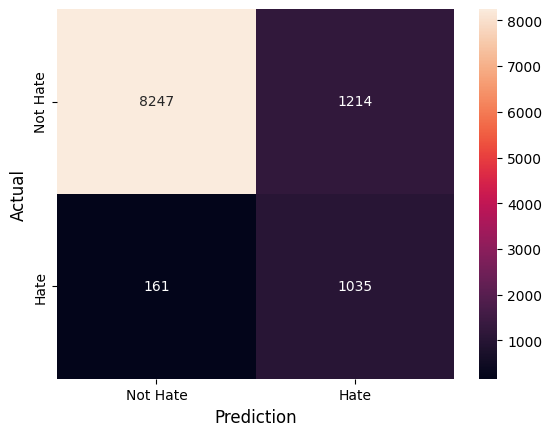

...........................................................................

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      9461
           1       0.46      0.87      0.60      1196

    accuracy                           0.87     10657
   macro avg       0.72      0.87      0.76     10657
weighted avg       0.92      0.87      0.89     10657



In [15]:
calculate_metrics(predictions_lemma)

### False positive analysis (actual-'hate', prediction-'nohate')

In [16]:
df.columns

Index(['Unnamed: 0', 'file_id', 'user_id', 'subforum_id', 'num_contexts',
       'label', 'text', 'corrected_text', 'lemma_text',
       'predicted_label_normal', 'predicted_score_normal',
       'predicted_label_lemma', 'predicted_score_lemma'],
      dtype='object')

In [17]:
df_fp=df.loc[(df['label'] =='hate') & (df['predicted_label_normal'] =='no hate')][['corrected_text','label','predicted_label_normal','predicted_score_normal']]
(print(len(df_fp)))

93


In [18]:
df_fp[11:20]

,corrected_text,label,predicted_label_normal,predicted_score_normal
874,i m surprised they re not holding the gun back...,hate,no hate,0.779350
1016,they always think they are somehow exempt from...,hate,no hate,0.857279
1084,i see so many bmwf around my city its not even...,hate,no hate,0.850975
1123,they must have trapped her somehow and sent h...,hate,no hate,0.674913
1166,thank you for your kind words hope to meet yo...,hate,no hate,0.944548
1206,perhaps i should walk back into my hs when it ...,hate,no hate,0.935731
1237,he should be flagged and reported skyyjohn s c...,hate,no hate,0.714348
1392,may they be put away for good,hate,no hate,0.640697
1430,back to where ya came from,hate,no hate,0.640518


In [19]:
list(df_fp['corrected_text'][11:20])

['i m surprised they re not holding the gun back to front',
 'they always think they are somehow exempt from the rules',
 'i see so many bmwf around my city its not even funny',
 'they must have trapped her somehow  and sent her thru the network to israel',
 'thank you for your kind words  hope to meet you in the new white world one day soon',
 'perhaps i should walk back into my hs when it starts monday and get on the pa system and say i want to tie all       s to the back of my car and drag them across the ground till they die  and then say i m joking',
 'he should be flagged and reported skyyjohn s channel  youtube establishedmencom sent me on a blind date',
 'may they be put away for good',
 'back to where ya came from']

### False negative analysis (actual-'nohate', prediction-'hate')

In [20]:
df_fn=df.loc[(df['label'] =='noHate') & (df['predicted_label_normal'] =='hate')][['corrected_text','label','predicted_label_normal','predicted_score_normal']]
(print(len(df_fn)))

1071


In [21]:
df_fn.head(10)

,corrected_text,label,predicted_label_normal,predicted_score_normal
25,no wonder young people ca nt get jobs,noHate,hate,0.912817
32,when the girl starts talking the guy in the mi...,noHate,hate,0.722952
52,comwatch v 6ok6ks7bsoy for a free informativ...,noHate,hate,0.587990
64,does this not show how stupid these folks can be,noHate,hate,0.832494
74,instead we are left to shed a tear for the bla...,noHate,hate,0.676837
77,there are white folks that require a little of...,noHate,hate,0.768137
84,hundreds of people but no blacks,noHate,hate,0.858377
85,i also attended a mastersphd graduation ceremo...,noHate,hate,0.783837
87,unfortunately there are some poor white famil...,noHate,hate,0.861752
118,the reason large white families were encourage...,noHate,hate,0.544932


In [22]:
list(df_fn['corrected_text'][:10])

['no wonder young people ca nt get jobs',
 'when the girl starts talking the guy in the middles lips start moving',
 'comwatch  v  6ok6ks7bsoy for a free informative booklet  video on the zionistengineered intentional destruction of white people go to  youtube',
 'does this not show how stupid these folks can be',
 'instead we are left to shed a tear for the black kids killed in a church bombing 40 years ago',
 'there are white folks that require a little of our time',
 'hundreds of people  but no blacks',
 'i also attended a mastersphd graduation ceremony at a major state university a few years ago  none of the cs degrees were awarded to blacks  a couple computer degrees went to blacks  but they were in it with a focus on internet marketingwebcommerce  so where are all these black computer geniuses hiding',
 'unfortunately  there are some poor white families where both parents work',
 'the reason large white families were encouraged those days was to build up the population of white g